# **Products and Market Risk 1**

## Question 3. Implement the multi-step binomial method as described in Binomial Method lecture with the following variables and parameters: stock S = 100, interest rate r = 0.05 (continuously compounded) for a call option with strike E = 100, and maturity T = 1. European payoff.

- Use any suitable parameterization for up and down moves uS, vS.

- Plot 1: compute option value for a range of volatility [0.05, . . . , 0.80] and plot the result (volatility at axe X, and option value axe Y). Trees to have a minimum four time steps.

- Plot 2: now, set σimp = 0.2 and compute and plot the value of one option, as you increase the
number of time steps NT S = 4, 5, . . . , 50.

Hint: This is a computational problem best coded in Python. You can visualize 1-2 trees (optional) but
especially in case of Excel computation, do not provide multiple pages of individual pricing trees.


<br>

***

<br>

**Step 1: parameterization of the ups and downs**

In binominal model we typically consider the length of 1 time step as $\Delta t = \frac {T} {N}$, here, N is the time step

One of the commonly used model is Cox-Ross-Rubinstein, which has a parameterization set of:

$$ \mu = e^{\sigma \sqrt {\Delta t}}, \quad d = e^{- \sigma \sqrt {\Delta t}}$$

Thus making the up and down movement symmetrical and relates to volatility and time step.

<br>

***

<br>

**Step 2: risk neutral probability**

Binominal model assumes risk neutral, thus, the risk neutral probability is calculated as:

$$q = \frac {e^{r \Delta t} - d } {u - d}$$

Now with $u, d, q$ in place, we can now construct the price movement tree and option value tree.

<br>

***

<br>

**Step 3: constructing the price movement tree and calculate option value backward**

For a binominal tree with N steps, we consider the price tree as:

- Step 0 with price $S_0 = 100$

- Step 1 with two nodes of $S_{0u}$ and $S_{0d}$

- Step 2 with three nodes of $S_{0u^2}$, $S_{0ud}$ and $S_{0d^2}$

- Continuing until step N with N+1 nodes

For a european option, the option value at the time of N is:

$$C_{N,j} = max (S_{N,j} - E, 0)$$

which, S_{N,j} represent the j node of the Nth step (j ranges from 0 to N)

Then we calculate backward

$$C_{N,j} = e^{- r \Delta t} [qC_{N+1,j+1} + (1 - q) C_{N+1,j}]$$

Eventually, $C_{0,0}$ is the option price

<br>

***

<br>

**Step 4: calculate the option prices with different volatility (Plot 1)**

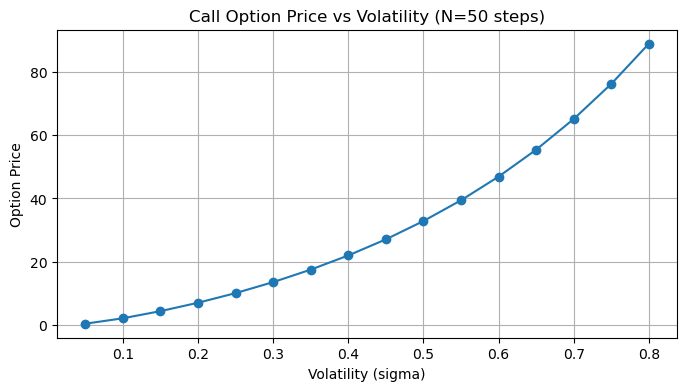

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
S0 = 100
E = 100
r = 0.05
T = 1.0

def binomial_option_price(S0, E, r, T, sigma, N):
    # N: number of time steps
    dt = T / N
    # Using CRR parameterization
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    
    # Risk-neutral probability
    q = (np.exp(r*dt) - d) / (u - d)
    
    # Construct the terminal option value array
    # Terminal node prices: S0 * u^(N-j) * d^(j) for j=0,1,...,N
    ST = np.array([S0 * (u**(N-j))*(d**j) for j in range(N+1)])
    # European call option payoff at maturity
    C = np.maximum(ST - E, 0)
    
    # Backward calculation of option value
    for n in range(N-1, -1, -1):
        # For step n, there are n+1 nodes
        C = np.exp(-r*dt) * (q*C[1:n+2] + (1-q)*C[0:n+1])  # Note the indices of C shorten each time
    
    # Finally, C[0] is the initial option value
    return C[0]

# Plot 1: Option prices for different sigma values
sigmas = np.arange(0.05, 0.81, 0.05)  # From 0.05 to 0.80, step 0.05
N_for_plot1 = 50  # Use enough steps to get a stable result

prices_vs_sigma = []
for sigma in sigmas:
    price = binomial_option_price(S0, E, r, T, sigma, N_for_plot1)
    prices_vs_sigma.append(price)

plt.figure(figsize=(8,4))
plt.plot(sigmas, prices_vs_sigma, marker='o')
plt.title('Call Option Price vs Volatility (N=50 steps)')
plt.xlabel('Volatility (sigma)')
plt.ylabel('Option Price')
plt.grid(True)
plt.show()

**Step 5: calculate the option prices with fixed volatility and varying time steps (Plot 2)**

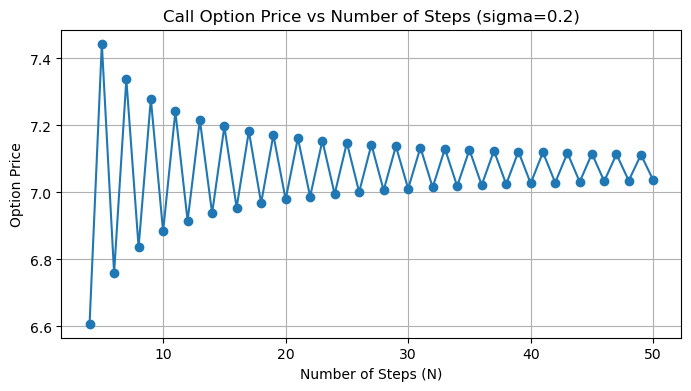

In [3]:
# Plot 2: given sigma=0.2，option prices with varying time steps
sigma_fixed = 0.2
N_values = np.arange(4, 51)  # from 4 to 50
prices_vs_N = []
for N in N_values:
    price = binomial_option_price(S0, E, r, T, sigma_fixed, N)
    prices_vs_N.append(price)

plt.figure(figsize=(8,4))
plt.plot(N_values, prices_vs_N, marker='o')
plt.title('Call Option Price vs Number of Steps (sigma=0.2)')
plt.xlabel('Number of Steps (N)')
plt.ylabel('Option Price')
plt.grid(True)
plt.show()